##########################################################
#### File: RattanavilayThip_Weeks_9_&_10_Exercises<br>
#### Name: Thip Rattanavilay<br>
#### Date: 05/23/2021<br>
#### Course: DSC 540 - Assignment: Weeks 9 & 10 Exercises<br>
##########################################################

## Here you'll find the activities for this weeks assignment

### 1. Data Wrangling with Python: Activity 9, page 294
### 2. Data Wrangling with Python: Activity 10, page 295

In [2]:
# import library
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling with Python: Activity 9, page 294

In [67]:
#Step 1 - I've imported the same libraries that the solution code to make sure I had the correct ones
#Step 2 - Check the SSL certificate this was provided by the book
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [68]:
#Step 3 - Read the html from the url
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [69]:
#Step 4 - Write a small function to check the status of the web request. 
#Found on pg 254 just combind the two functions they used into one so I didn't have to write two 
#separate with the return 1 or -1 as well as printing success or not
def status_check(r):
    if r.status_code ==200:
        print("Successful response")
        return 1
    else:
        print("Response not successful")
        return -1
    
status = status_check(response)
    

Successful response


In [70]:
#Step 5 - Decode the response and pass this on to Beautiful Soup for html parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="ebooks, ebook, books, book, free, online, audio" name="keywords"/>
  <meta content="33000+ free ebooks online" name="description"/>
  <meta content="public" name="classification"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <script type="application/javascript">
   if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
  </script>
  <link href="/css/pg-002.css" rel="stylesheet" type="text/css"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <title>
   Top 100 - Project Gutenberg
  </title>
 </head>
 <body>
  <div class="menubar">
   <div class="logo" id="logo">
    <a class

In [71]:
#Step 6 - Find all the href tags and store them in the list of links. Check what the list looks like - 
#print the first 30 elements
link_href = []
for link in soup.find_all('a'):
    link_href.append(link.get('href'))
    
link_href[:30]
#Tried doing this based off the code example on pg 255, but when I printed the list out it was still
#empty for some reason. Ended up using solution code here to get it to work right. Played with it and 
#when I switched the a out to a different letter it was empty 

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/25525',
 '/ebooks/11',
 '/ebooks/1635',
 '/ebooks/84',
 '/ebooks/2701',
 '/ebooks/376',
 '/ebooks/1661',
 '/ebooks/98',
 '/ebooks/844',
 '/ebooks/1952']

In [72]:
#Step 7 - Use a regular expression to find the numeric digits in these links. 
#These are the file numbers for the top 100 eBooks
file_num=[] #Creating an empty list to use for the file numbers
for i in range(19,119): #Range provided by book code
    link=link_href[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        #Use append to add to list
        file_num.append(int(n[0]))

#Step 8 - Initiatlize the empty list to hold the file numbers over and appropriate 
#range and use regex to find the numeric digigst in the link href string. Use the findall method
print ("\nThe file numbers for the top 100 ebooks \n"+"-"*70)
print(file_num)       


The file numbers for the top 100 ebooks 
----------------------------------------------------------------------
[1342, 25525, 11, 1635, 84, 2701, 376, 1661, 98, 844, 1952, 514, 1080, 74, 2542, 58975, 43, 5200, 174, 215, 1250, 1400, 120, 2600, 345, 205, 2591, 4300, 76, 1232, 27827, 158, 16, 1064, 2852, 1184, 1260, 42686, 5740, 45, 16328, 62059, 28054, 135, 1998, 46, 62056, 58585, 219, 768, 1497, 62057, 28860, 2814, 1399, 244, 55, 113, 160, 2554, 36, 2500, 996, 863, 25344, 23700, 3600, 203, 6130, 4363, 62063, 2680, 3207, 8800, 35, 3825, 40766, 1727, 236, 2000, 730, 521, 161, 829, 408, 62068, 100, 140, 62062, 766, 972, 3296, 14838, 62052, 42108, 43453, 145, 19942, 7370, 42324]


In [73]:
#Step 9 - What does the soup objects's text look like? Use the.
#text method and print only the first 2,000 characters
print(soup.text[:2000])











      if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
    
 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not cons

In [74]:
#Steps 10 - 13 it made sense to me to combine these together
yesterday_list = [] #create the empty list to add to but this will be temporary
#Creating the start index that points to the top 100 ebooks from yesterday
start_ind=soup.text.splitlines().index('Top 100 EBooks yesterday')
#Loops 1-100 and adds the strings of the next 100 lines to my temporary list
for i in range(100):
    yesterday_list.append(soup.text.splitlines()[start_ind+2+i])
#Creating a new list then adding titles to it using match and span
titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',yesterday_list[i]).span()
    titles.append(yesterday_list[i][id1:id2])
for l in titles:
    print(l)
    


Pride and Prejudice by Jane Austen 
The Works of Edgar Allan Poe
Alice
Ion by Plato 
Frankenstein
Moby Dick
A Journal of the Plague Year by Daniel Defoe 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Tale of Two Cities by Charles Dickens 
The Importance of Being Earnest
The Yellow Wallpaper by Charlotte Perkins Gilman 
Little Women by Louisa May Alcott 
A Modest Proposal by Jonathan Swift 
The Adventures of Tom Sawyer by Mark Twain 
Et dukkehjem
Index of Project Gutenberg Works on Black History by Various 
The Strange Case of Dr
Metamorphosis by Franz Kafka 
The Picture of Dorian Gray by Oscar Wilde 
The Call of the Wild by Jack London 
Anthem by Ayn Rand 
Great Expectations by Charles Dickens 
Treasure Island by Robert Louis Stevenson 
War and Peace by graf Leo Tolstoy 
Dracula by Bram Stoker 
Walden
Grimms
Ulysses by James Joyce 
Adventures of Huckleberry Finn by Mark Twain 
Il Principe
The Kama Sutra of Vatsyayana by Vatsyayana 
Emma by Jane Austen 
Peter Pan by J
The M

# Data Wrangling with Python: Activity 10, page 295

In [75]:
#Step 1 - Added import json at the top. Already had the others called out
#Step 2 - Load the secret API key from a JSON file stored in the same folder in a variable, by using json.loads.
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']
#then saved to the folder that I'm currently using to call things which takes care of step 3 &4

In [76]:
#Steps 5 & 6 create two variables one for the url and one that has the api key plus the url
servurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi
#Step 7 - Write a function called print_json to print hte movie data from a json file 
#(specifics called out on activity)
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'] #These were called out in book code
    print("-"*60)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*60)

In [77]:
#Step 8 - Write a utility function to download a poster of the movie based on the information 
#from the JSON dataset and save it in your local folder.
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster'] #Json key the poster is stored at
    # Splits the poster url by '.'
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file 
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()
    

In [78]:
#Step 9 - Write a utility function called search_movie to search for a movie by its name, 
#print the downloaded JSON data, and save the movie poster in the local folder
def search_movie(title):
    try:
        url = servurl + urllib.parse.urlencode({'t': str(title)})+apikey 
        print(f'Searching the data for "{title}" ... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            #Saves the poster
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error found: ",json_data['Error']) #If it can't find request prints error found
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [79]:
#Step 10 - Test the search_movie function by entering Titanic
search_movie("Titanic")
#And now I'm feeling old seeing Titanic came out in 1997

Searching the data for "Titanic" ... 
http://www.omdbapi.com/?t=Titanic&apikey=d6d0d193
------------------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian
Country: USA
Awards: Won 11 Oscars. Another 114 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,004,959
imdbID: tt0120338
------------------------------------------------------------


In [80]:
#Step 11 - Test the search_movie function by entering "Random_error"
search_movie("Random_error")
#As expected it wasn't found

Searching the data for "Random_error" ... 
http://www.omdbapi.com/?t=Random_error&apikey=d6d0d193
Error found:  Movie not found!


# Connect to the Twitter API and do a simple data pull

In [82]:
# install twitter python - 
# !pip install python-twitter

#import twitter
import twitter

In [83]:
#Entering in credentials and making sure they work
api = twitter.Api(consumer_key='ZicsHhl5df1JEEd5wSRclNwxqC',
  consumer_secret='3kwz8rGZCJJ8NZhmBCtgSv7K1n2UyOyBuRujBpYF12qOKT22RxD',
    access_token_key='85224761303861657601-qdDqarSJ6zsQsLfEDbudJrVrgNhksuEd',
    access_token_secret='7CtP2hY8hDtMLNH3xKmw8vChppHGqZsnCIG91lwkWo4uQ7')
print(api.VerifyCredentials())

{"created_at": "Wed Mar 2021 19:50:39 +0000 2021", "description": "(Prounouns: she/her) Tester, advocate, cat lover, traveler, reader, disabilities warrior, and chocolate enthusiast.", "favourites_count": 727, "followers_count": 282, "friends_count": 199, "geo_enabled": true, "id": 85224761303861657601, "id_str": "85224761303861657601", "listed_count": 6, "location": "Belton, MO", "name": "Thip Rattanavilay", "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/85224761303861657601/1492191668", "profile_image_url": "http://pbs.twimg.com/profile_images/1234932828191719425/7F6jZCR-_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1234932828191719425/7F6jZCR-_normal.jpg", "profile_link_color": "19CF86", "profile_sidebar_border_color": "000000"

In [84]:
#Download user timeline
statuses = api.GetUserTimeline(screen_name='Thip Rattanavilay')
print([s.text for s in statuses])
#Using my twitter account for this class, I mainly use my account for sports, news, random, and crypto tweets.
#Please disregard what tweets I have pulled, this is all for educational purposes only.


['Anyone know how long it can take to get access for twitter development? School assignment wants us to create an app… https://t.co/q2P6YpKKrY', 'Python can be so frustrating sometimes. Learning about generator expressions and it baffles me that using () instea… https://t.co/k47VzK2VWn', '@GovParsonMO Dude first June only goes to the 30th. Second you need to shut the state down so we can actually have… https://t.co/Lhi83xhAWh', "#AskGovParson Why haven't you ordered a shelter-in-place for the state of Missouri yet?", 'Today I celebrate my transgender friends on this International Transgender Day of Visibility. Take some time to lea… https://t.co/csXxBNTOMu', '@paulwesley I can’t stop taking mine', 'Work and school space for the next month https://t.co/9gnBtZLCoR', 'Start on the test overhaul project next week. Any advice on restructuring existing tests and add in about 100 new ones?', '@FriendlyTester The county of the state I live in issues stay at home order. So I’m going to work ful

In [86]:
#Pulling data using data science as my term
api.GetSearch(term='datascience', since=2016-11-21, count=10)

[Status(ID=1259712726584250368, ScreenName=KirkDBorne, Created=Mon May 11 05:11:33 +0000 2020, Text='Explore TOP #DataScience #MachineLearning #AI #DeepLearning Books for reading, learning, &amp; growing your knowledge:… https://t.co/Vu9Kt3wcpi'),
 Status(ID=1259830113459408896, ScreenName=KirkDBorne, Created=Mon May 11 12:58:00 +0000 2020, Text='The Next Analytics Age — Machine Learning: https://t.co/BkZDP9eF1t by @SASsoftware and @HarvardBiz \n———————… https://t.co/g6FiB26tkL'),
 Status(ID=1259700032175046661, ScreenName=KirkDBorne, Created=Mon May 11 04:21:06 +0000 2020, Text='The Art of Thinking Like a #DataScientist:\n1) The Workbook: https://t.co/8QTgRJXSnV \n2) The "Movie":… https://t.co/t5ZQGSOLqP'),
 Status(ID=1259987792202956801, ScreenName=abarbap, Created=Mon May 11 23:24:33 +0000 2020, Text='RT @gp_pulipaka: Free MIT #MachineLearning and #Statistics Online Courses to Boost Your Skills As You Self-Isolate. #BigData #DataScience #…'),
 Status(ID=1259987761559490560, ScreenNa

# Using one of the datasets provided, choose 3 of the following visualizations to complete.

In [3]:
#Creating dataframe and reading in the csv I chose for this exercise
df = pd.read_csv("multiTimeline.csv", skiprows=3, names= ['Month','Cupcake: (Worldwide)']) 
df.head()

,Month,Cupcake: (Worldwide)
0,2004-01,5
1,2004-02,6
2,2004-03,6
3,2004-04,5
4,2004-05,6


In [4]:
#Creating a column separately for year
df['year'] = pd.DatetimeIndex(df['Month']).year
df.head()

,Month,Cupcake: (Worldwide),year
0,2004-01,5,2004
1,2004-02,6,2004
2,2004-03,6,2004
3,2004-04,5,2004
4,2004-05,6,2004


In [5]:
#Create a column separately for month
df['month'] = pd.DatetimeIndex(df['Month']).month
df.head()

,Month,Cupcake: (Worldwide),year,month
0,2004-01,5,2004,1
1,2004-02,6,2004,2
2,2004-03,6,2004,3
3,2004-04,5,2004,4
4,2004-05,6,2004,5


In [6]:
#I have two separate columns for date
df.drop(columns=['Month'])

,Cupcake: (Worldwide),year,month
0,5,2004,1
1,6,2004,2
2,6,2004,3
3,5,2004,4
4,6,2004,5
...,...,...,...
185,44,2021,6
186,41,2021,7
187,42,2021,8
188,44,2021,9


month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

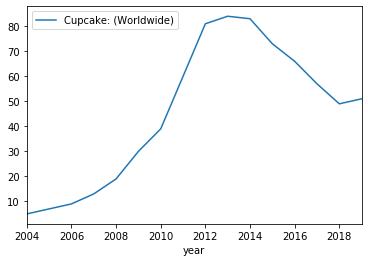

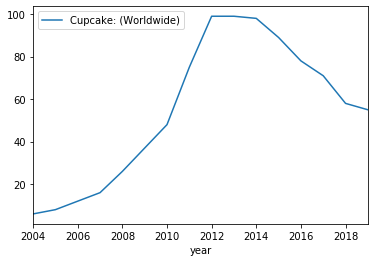

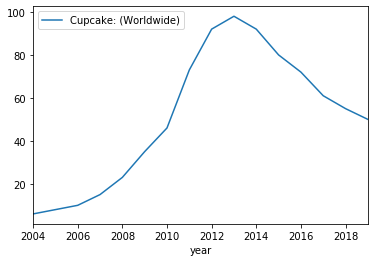

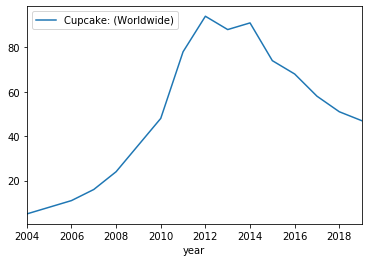

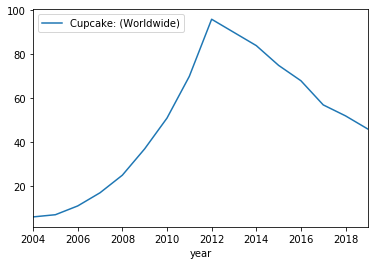

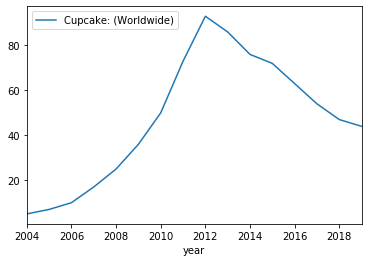

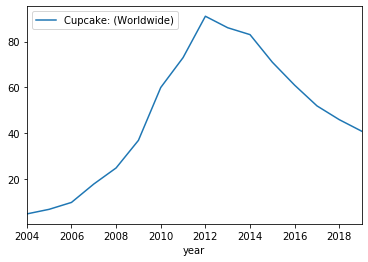

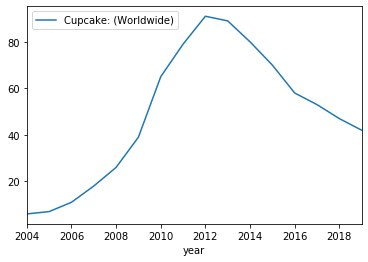

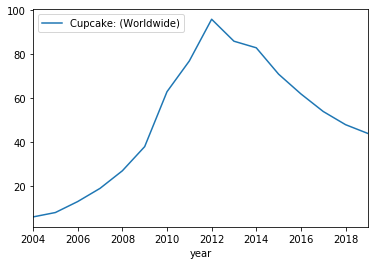

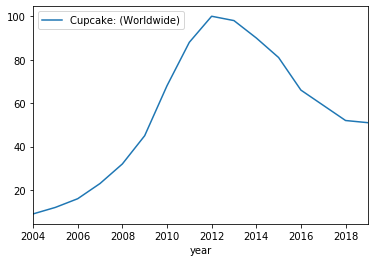

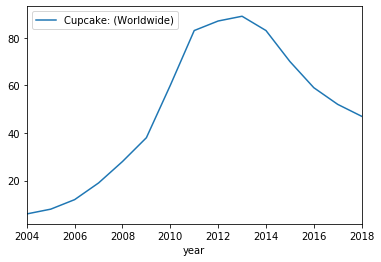

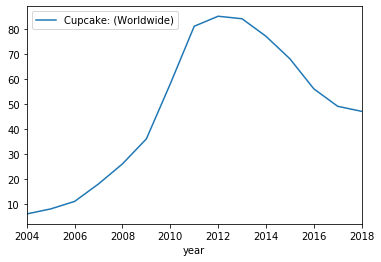

In [12]:
#charts for cupcake by year for each separate month. 
df.groupby("month").plot(x="year", y="Cupcake: (Worldwide)")

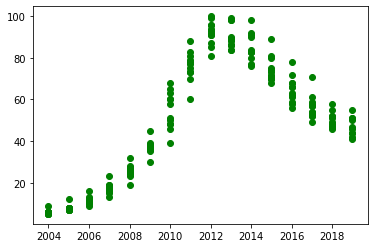

In [13]:
#Scatter plot. I want year as my x axis and cupcake as y. 
plt.scatter(df['year'], df['Cupcake: (Worldwide)'], c='green')

<BarContainer object of 190 artists>

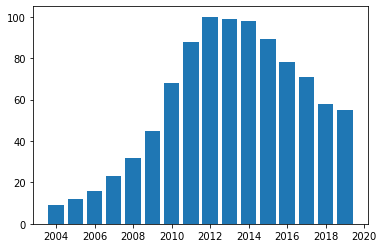

In [15]:
#Bar plot. This one is based on years
plt.bar(df['year'], df['Cupcake: (Worldwide)'])